In [621]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-potability/water_potability.csv


In [622]:
data = pd.read_csv("/kaggle/input/water-potability/water_potability.csv")

In [623]:
data.head

<bound method NDFrame.head of             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135  

In [624]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [625]:
data.shape

(3276, 10)

In [626]:
data[data.columns].isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [627]:
n = data.nunique(axis=0) 

In [628]:
n

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [629]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

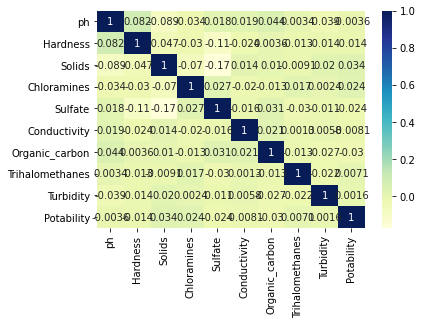

In [630]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [631]:
print(data.corr())

                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   
Potability      -0.003556 -0.013837  0.033743     0.023779 -0.023577   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.018614        0.043503         0.003354  -0.039057   
Hardness            -0.023915        0.003610        

In [632]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [633]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [634]:
data['Potability'] = data['Potability'].astype(float)

Approach 1:Filling NaN values by mean of the column:

In [635]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability         float64
dtype: object

In [636]:
data = data.ffill(axis=0)

In [637]:
data = data.bfill(axis=0)

In [638]:
data.shape

(3276, 10)

In [639]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.716080,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,368.516441,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,368.516441,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,359.948574,392.449580,19.903225,66.687695,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,359.948574,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,359.948574,402.883113,11.168946,77.488213,4.708658,1.0


In [640]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.716080,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,368.516441,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,368.516441,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


In [641]:
data[data.columns].isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

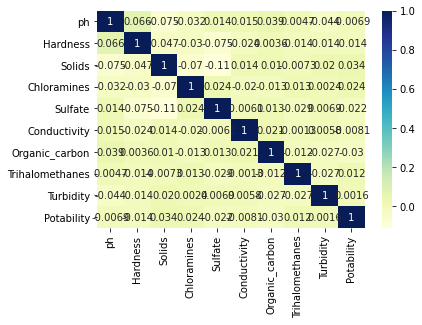

In [642]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Only Organic carbon has a negative effect on potability through this data

In [643]:
X = data.drop(['Potability','Organic_carbon', 'Trihalomethanes', 'Turbidity'],axis=1)
Y = data['Potability']

In [644]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

In [645]:
from xgboost import XGBClassifier

In [646]:
xgb_model = XGBClassifier(random_state = 0 ,use_label_encoder=False)
xgb_model.fit(X_train, Y_train)

print("Feature Importances : ", xgb_model.feature_importances_) 

[19:52:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature Importances :  [0.18883461 0.16259407 0.15566102 0.17658375 0.18458998 0.13173649]


In [647]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [648]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [649]:
lm.fit(X_train,Y_train)

LogisticRegression()

In [650]:
predictions = lm.predict(X_test)
from sklearn import metrics
y_pred = lm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Accuracy: 0.623951182303585
Mean Absolute Error: 0.37604881769641496
Mean Squared Error: 0.37604881769641496
Root Mean Squared Error: 0.6132281938205507


In [651]:
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [652]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.62      0.77      1311
         1.0       0.00      0.00      0.00         0

    accuracy                           0.62      1311
   macro avg       0.50      0.31      0.38      1311
weighted avg       1.00      0.62      0.77      1311



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [653]:
print(confusion_matrix(y_pred,Y_test))

[[818 493]
 [  0   0]]


In [654]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators = 100)   

clf.fit(X_train, Y_train) 
 
y_pred = clf.predict(X_test) 

from sklearn import metrics 
accuracy_s =  metrics.accuracy_score(Y_test, y_pred)
print(accuracy_s)

0.7063310450038138


In [655]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Accuracy: 0.7063310450038138
Mean Absolute Error: 0.2936689549961861
Mean Squared Error: 0.2936689549961861
Root Mean Squared Error: 0.5419123130140024


In [656]:
print(classification_report(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))

              precision    recall  f1-score   support

         0.0       0.88      0.71      0.79      1007
         1.0       0.42      0.68      0.52       304

    accuracy                           0.71      1311
   macro avg       0.65      0.70      0.65      1311
weighted avg       0.77      0.71      0.73      1311

[[720 287]
 [ 98 206]]


In [657]:
from sklearn.svm import SVC
model = SVC(kernel='linear',random_state=42)
model.fit(X_train,Y_train)

SVC(kernel='linear', random_state=42)

In [658]:
confirm = model.predict(X_test)
model.score(X_test,Y_test)

0.623951182303585

In [659]:

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.601, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.601, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.601, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.601, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.601, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.603, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.606, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.606, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.603, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.603, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   30.5s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [660]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Accuracy: 0.7063310450038138
Mean Absolute Error: 0.2936689549961861
Mean Squared Error: 0.2936689549961861
Root Mean Squared Error: 0.5419123130140024


In [ ]:
MAX ACCURACY:USING FORWARD FILL FOLLOWED BY BACKWORD FILL,USING XGBOOST REMOVING UNECESSARY FEATURES.

ACCURACY OF 70%(GOOD CONCERNING ONLY 3276 EXAMPLES) USING RANDOM FORESTS CLASSIFIER AFTER TRYING MANY POSSIBILITIES, CHECKING CREDIBILITY OF FEATURES,MANY FILLING WAYS OF NAN VALUES AND ALGORITHMS.
HOPEFULLY THIS NOTEBOOK HELPS YOU. IF YOU FOUND THIS USEFUL, GIVE AN UPVOTE.
